# Homework set 2

# Exercise 0


- Amir Sahrani (12661651)
- Jonas Schäfer (14039982)



## Importing packages

In [106]:
import math
import numpy as np
from numpy.linalg import norm, inv
from scipy.sparse import csr_array
from scipy.sparse.linalg import spsolve
from scipy.linalg import solve
import timeit
import pandas as pd

# Sparse matrices

A matrix is called sparse if only a small fraction of the entries is nonzero. For such matrices, special data formats exist. `scipy.sparse` is the scipy package that implements such data formats and provides functionality such as the LU decomposition (in the subpackage `scipy.sparse.linalg`).

As an example, we create the matrix 

$$
\begin{bmatrix}
1 & 0 & 2 & 0 \\ 
0 & 3 & 0 & 0 \\
0 & 0 & 4 & 5 \\
0 & 0 & 0 & 6 
\end{bmatrix}
$$

in the so called compressed sparse row (CSR) format. As you can see, the arrays `row`, `col`, `data` contain the row and column coordinate and the value of each nonzero element respectively.

In [107]:
# a sparse matrix with 6 nonzero entries
row = np.array([0, 0, 1, 2, 2, 3])
col = np.array([0, 2, 1, 2, 3, 3])
data = np.array([1.0, 2, 3, 4, 5, 6])
sparseA = csr_array((data, (row, col)), shape=(4, 4))

# convert to a dense matrix. This allows us to print to screen in regular formatting
denseA = sparseA.toarray()
print(denseA)

[[1. 0. 2. 0.]
 [0. 3. 0. 0.]
 [0. 0. 4. 5.]
 [0. 0. 0. 6.]]


For sparse matrices, a sparse data format is much more efficient in terms of storage than the standard array format. Because of this efficient storage, very large matrices of size $n \times n$ with $n = 10^7$ or more can be stored in RAM for performing computations on regular computers. Often the number of nonzero elements per row is quite small, such as 10's or 100's nonzero elements per row. In a regular, dense format, such matrices would require a supercomputer or could not be stored.

In the second exercise you have to use the package `scipy.sparse`, please look up the functions you need (or ask during class).

# Heath computer exercise 2.1

## (a)
Show that the matrix
$$ A = \begin{bmatrix} 
0.1 & 0.2 & 0.3 \\
0.4 & 0.5 & 0.6 \\
0.7 & 0.8 & 0.9
\end{bmatrix}.$$
is singular. Describe the set of solutions to the system $A x = b$ if
$$ b = \begin{bmatrix} 0.1 \\ 0.3 \\ 0.5 \end{bmatrix}. $$
(N.B. this is a pen-and-paper question.)


$$
\begin{aligned}
    \det A &=0.1\cdot\det
    \begin{bmatrix}
        0.5&0.6\\
        0.8&0.9
    \end{bmatrix} -0.2\cdot\det
    \begin{bmatrix}
        0.4&0.6\\
        0.7&0.9
    \end{bmatrix}+0.3
    \begin{bmatrix}
    0.4&0.5\\
    0.7&0.8
    \end{bmatrix}\\
    &=0.1\cdot(0.45-0.48)-0.2\cdot(0.36-0.42)+0.3\cdot(0.32-0.35)\\
    &=0.1\cdot(-0.09)-0.2\cdot(-0.06)+0.3(-0.03)\\
    &=-0.003+0.012-0.009\\
    &=0
\end{aligned}
$$
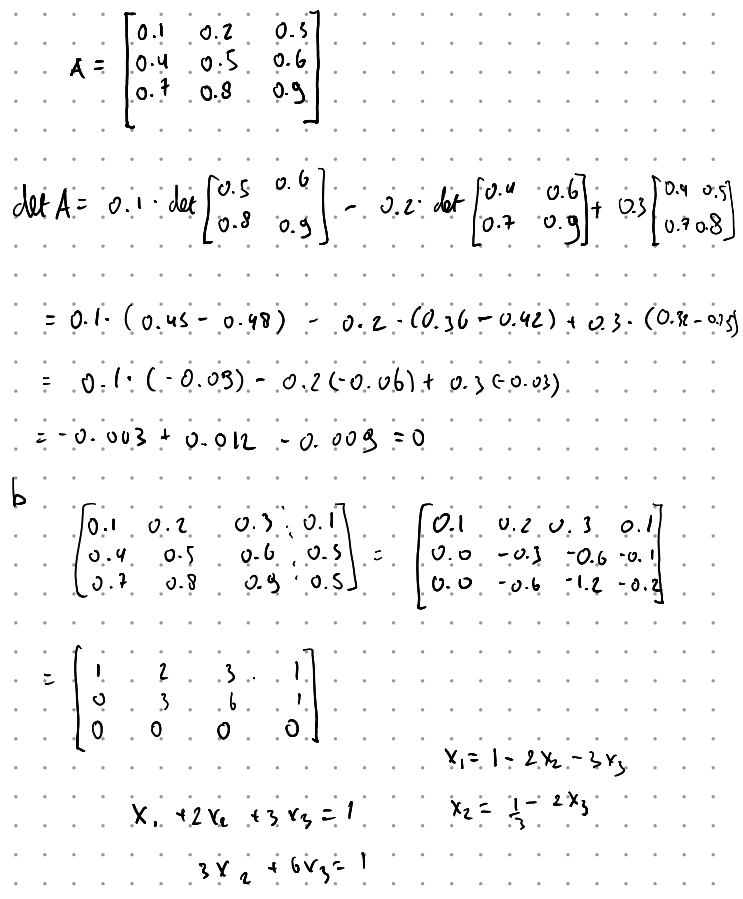

## (b)
If we were to use Gaussian elimination with partial pivoting to solve this system using exact arithmetic, at what point would the process fail?


$$
\begin{bmatrix}
    0.1&0.2&0.3&0.1\\
    0.4&0.5&0.4&0.5\\
    0.7&0.8&0.9&0.5
\end{bmatrix}
=
\begin{bmatrix}
    0.1&0.2&0.3&0.1\\
    0.0&-0.3&-0.6&-0.1\\
    0.0&-0.6&-1.2&-0.2
\end{bmatrix}
=
\begin{bmatrix}
    1&2&3&1\\
    0&3&6&1\\
    0&0&0&0
\end{bmatrix}

\Rightarrow

\left\{
    \begin{array}{l}
        x_1 + 2x_2 + 3x_3 = 1 &\\
        3x_2 + 6x_3 = 1
    \end{array} 
\right.
\Leftrightarrow
\left\{
    \begin{array}{l}
        x_1 = 1 - 2x_2 - 3x_3 &\\
        x_2 = \frac{1}{3} - 2x_3
    \end{array} 
\right.
$$

The result would fail when trying to get a pivot in the last row, because this row and the row above it will be identical, you would be left with no pivots in to bottom row and have infinetly many solutions

## (c)
Because some of the entries of $A$ are not exactly representable in a binary floating point system, the matrix is no longer exactly singular when entered into a computer; thus, solving the system by Gaussian elimination will not necessarily fail. Solve this system on a computer using a library routine for Gaussian elimination. Compare the computed solution with your description of the solution set in part (a). What is the estimated value for $\text{cond}(A)$? How many digits of accuracy in the solution would this lead you to expect?

In [108]:
A = np.matrix([[0.1, 0.2, 0.3],
               [0.4, 0.5, 0.6],
               [0.7, 0.8, 0.9]])
b = np.array([0.1, 0.3, 0.5])

sol = solve(A, b)
print(sol)

[ 0.06327986  0.87344029 -0.27005348]


/var/folders/tg/bfb__1d16td__2vd879zjkrh0000gn/T/ipykernel_8000/3853669430.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.02982e-17): result may not be accurate.
  sol = solve(A, b)


We find that
$$x = \begin{bmatrix}0.06327986\\0.87344029\\-0.27005348\end{bmatrix}$$
with a condition number of $1.02982 \times 10^{-17}$ using the `scipy.linalg.solve` function.

# Heath computer exercise 2.17

Consider a horizontal cantilevered beam that is clamped at one end but free along the remainder of its length. A discrete model of the forces on the beam yields a system of linear equations $A x = b$, where the $n \times n$ matrix $A$ has the banded form
$$
\begin{bmatrix}
 9 & -4     &  1 &  0 & \ldots & \ldots & 0 \\
-4 &  6     & -4 &  1 & \ddots && \vdots \\
 1 & -4     &  6 & -4 &  1 & \ddots & \vdots \\
 0 & \ddots & \ddots & \ddots & \ddots & \ddots & 0 \\
 \vdots & \ddots & 1 & -4 &  6 & -4 &  1 \\ 
 \vdots && \ddots    &  1 & -4 &  5 & -2 \\
 0 & \ldots & \ldots & 0 & 1 & -2 & 1 
\end{bmatrix}, $$
the $n$-vector $b$ is the known load on the bar (including its own weight), and the $n$-vector $x$ represents the resulting deflection of the bar that is to be determined. We will take the bar to be uniformly loaded, with $b_i = 1/n^4$ for each component of the load vector.


## (a)
Make a python function that creates the matrix $A$ given the size $n$.

In [109]:
def cantilevered_beam_matrix(n):
    main_diag = 6 * np.ones(n)
    main_diag[[0, -2, -1]] = [9, 5, 1]
    middle_diag = -4 * np.ones(n-1)
    middle_diag[-1] = -2
    upper_diag = np.ones(n-2)
    A = np.diag(main_diag) + np.diag(middle_diag, k=1) + np.diag(upper_diag,
                                                                 k=2) + np.diag(middle_diag, k=-1) + np.diag(upper_diag, k=-2)
    return A


def get_b(n):
    return np.ones(n)/n**4


print(cantilevered_beam_matrix(6))

[[ 9. -4.  1.  0.  0.  0.]
 [-4.  6. -4.  1.  0.  0.]
 [ 1. -4.  6. -4.  1.  0.]
 [ 0.  1. -4.  6. -4.  1.]
 [ 0.  0.  1. -4.  5. -2.]
 [ 0.  0.  0.  1. -2.  1.]]


## (b)

Solve this linear system using both a standard library routine for dense linear systems and a library routine designed for sparse linear systems. Take $n=100$ and $n=1000$. How do the two routines compare in the time required to compute the solution? And in the memory occupied by the LU decomposition? (Hint: as part of this assignment, look for the number of nonzero elements in the matrices $L$ and $U$ of the sparse LU decomposition.)

In [110]:
def solve_cantilevered_beam_matrix(n, method):
    A = cantilevered_beam_matrix(n)
    b = get_b(n)
    match(method):
        case 'default':
            sol = solve(A, b)
            return sol, A
        case 'sparse':
            sparse_A = csr_array(A)
            sol = spsolve(sparse_A, b)
            return sol, sparse_A
        case _:
            raise ValueError('method must be either default or sparse')

def cantilevered_comparison(N_sim=100):
    time_default_100 = timeit.timeit("solve_cantilevered_beam_matrix(100, 'default')", number=N_sim, globals=globals()) / N_sim
    sol_100_default, A_100_default = solve_cantilevered_beam_matrix(100, 'default')
    mem_100_default, nonzero_100_default = A_100_default.data.nbytes, np.count_nonzero(A_100_default.data)
    time_sparse_100 = timeit.timeit("solve_cantilevered_beam_matrix(100, 'sparse')", number=N_sim, globals=globals()) / N_sim
    sol_100_sparse, A_100_sparse = solve_cantilevered_beam_matrix(100, 'sparse')
    mem_100_sparse, nonzero_100_sparse = A_100_sparse.data.nbytes, np.count_nonzero(A_100_sparse.data)
    time_default_1000 = timeit.timeit("solve_cantilevered_beam_matrix(1000, 'default')", number=N_sim, globals=globals()) / N_sim
    sol_1000_default, A_1000_default = solve_cantilevered_beam_matrix(1000, 'default')
    mem_1000_default, nonzero_1000_default = A_1000_default.data.nbytes, np.count_nonzero(A_1000_default.data)
    time_sparse_1000 = timeit.timeit("solve_cantilevered_beam_matrix(1000, 'sparse')", number=N_sim, globals=globals()) / N_sim
    sol_1000_sparse, A_1000_sparse = solve_cantilevered_beam_matrix(1000, 'sparse')
    mem_1000_sparse, nonzero_1000_sparse = A_1000_sparse.data.nbytes, np.count_nonzero(A_1000_sparse.data)
    data_table = pd.DataFrame({'method': ['default', 'sparse', 'default', 'sparse'],
                            'n': [100, 100, 1000, 1000],
                            'nonzero entries': [nonzero_100_default, nonzero_100_sparse, nonzero_1000_default, nonzero_1000_sparse],
                            'average runtime (in ms)': [f'{time*1000:.3f}' for time in [time_default_100, time_sparse_100, time_default_1000, time_sparse_1000]],
                            'memory (in bytes)': [mem_100_default, mem_100_sparse, mem_1000_default, mem_1000_sparse],})
    print('Difference of solutions between default and sparse matrix decomposition')
    print(f'for n=100: {norm(sol_100_default-sol_100_sparse):.3e}\nfor n=1000: {norm(sol_1000_default-sol_1000_sparse):.3e}')
    return data_table

data_table = cantilevered_comparison(100)
data_table

Difference of solutions between default and sparse matrix decomposition
for n=100: 5.632e-11
for n=1000: 4.315e-06


,method,n,nonzero entries,average runtime (in ms),memory (in bytes)
0,default,100,494,0.447,80000
1,sparse,100,494,0.401,3952
2,default,1000,4994,23.260,8000000
3,sparse,1000,4994,9.465,39952


As we can observe from the table above, thwe find that the LU decomposition using the sparse matrix both cuts our average runtime roughly in half compared to our default method, as well as massively decreases the memory required due to the low number of non-zero entries.

## (c)
For $n=100$, what is the condition number? What accuracy do you expect based on the condition number?

In [111]:
def condition_number(A):
    return norm(A) * norm(inv(A))

A = cantilevered_beam_matrix(100)
print(f'{condition_number(A):.3e}')

6.808e+08


A large condition number shows us that A is ill-conditioned and decreases the numerical stability of the decompostion and thus reliability of the computed results to our system of equations.

## (d)
How well do the answers of (b) agree with each other (make an appropriate quantitative comparison)?

Should we be worried about the fact that the two answers are different?

As we see in our statistical analysis of (b), for $n=100$ we observed a difference of `5.632e-11` and for $n=1000$ a difference of `4.315e-06`. These showcase that we find significant deviations based on the evaluation methodology and we should utilise the appropriate data structures depending on the choice of $n$ as well as the matrix $A$. Especially for large $n$, sparse matrices should be used.